In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Создайте DataFrame с вашими данными
data = {
    'Country': ['Россия', 'Австралия', 'Австрия', 'Азербайджан', 'Армения', 'Белоруссия', 'Бельгия', 'Болгария', 'Великобритания', 'Венгрия', 'Германия', 'Греция', 'Грузия', 'Дания', 'Ирландия', 'Испания', 'Италия', 'Казахстан', 'Канада', 'Киргизия'],
    'x(1)': [55, 100, 93, 60, 20, 60, 20, 60, 72, 60, 85, 29, 65, 67, 73, 88, 83, 21, 98, 99],
    'x(2)': [84.98, 30.58, 93.42, 38.42, 60.34, 60.22, 60.79, 29.82, 70.57, 34.51, 64.73, 36.63, 32.84, 62.64, 34.07, 39.27, 28.46, 30.27, 69.04, 25.42],
    'x(3)': [20.4, 3.2, 28, 124, 71.4, 8.5, 121, 87, 78.7, 9.2, 146, 74, 12.1, 3.3, 52, 141, 10.9, 3.2, 72, 134],
    'x(4)': [20.4, 5.4, 38, 120, 79.7, 8.3, 83, 72, 17.3, 5.4, 92, 156, 69.7, 7.1, 91, 91, 24.5, 6.0, 73, 106],
    'x(5)': [76.2, 8.6, 138, 73, 44.4, 5.7, 99, 108, 11.3, 3.5, 55, 140, 79.2, 6.7, 87, 102, 57.0, 6.7, 87, 102],
    'x(6)': [54.8, 7.3, 103, 72, 72.1, 8.5, 169, 118, 13.4, 3.3, 10, 191, 79.9, 10.2, 123, 77, 11.2, 3.4, 20, 134]
}

df = pd.DataFrame(data)

# Выделите числовые признаки для кластеризации и масштабируйте их
X = df.iloc[:, 2:].values  # Исключаем столбцы 'Country' и 'x(1)', так как они не числовые
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Примените метод K-means для кластеризации на 3 кластера (по желанию можно изменить количество)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Выведите результаты кластеризации
print(df[['Country', 'Cluster']])


           Country  Cluster
0           Россия        1
1        Австралия        0
2          Австрия        1
3      Азербайджан        2
4          Армения        1
5       Белоруссия        0
6          Бельгия        2
7         Болгария        2
8   Великобритания        1
9          Венгрия        0
10        Германия        1
11          Греция        2
12          Грузия        2
13           Дания        0
14        Ирландия        2
15         Испания        2
16          Италия        0
17       Казахстан        0
18          Канада        1
19        Киргизия        2


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


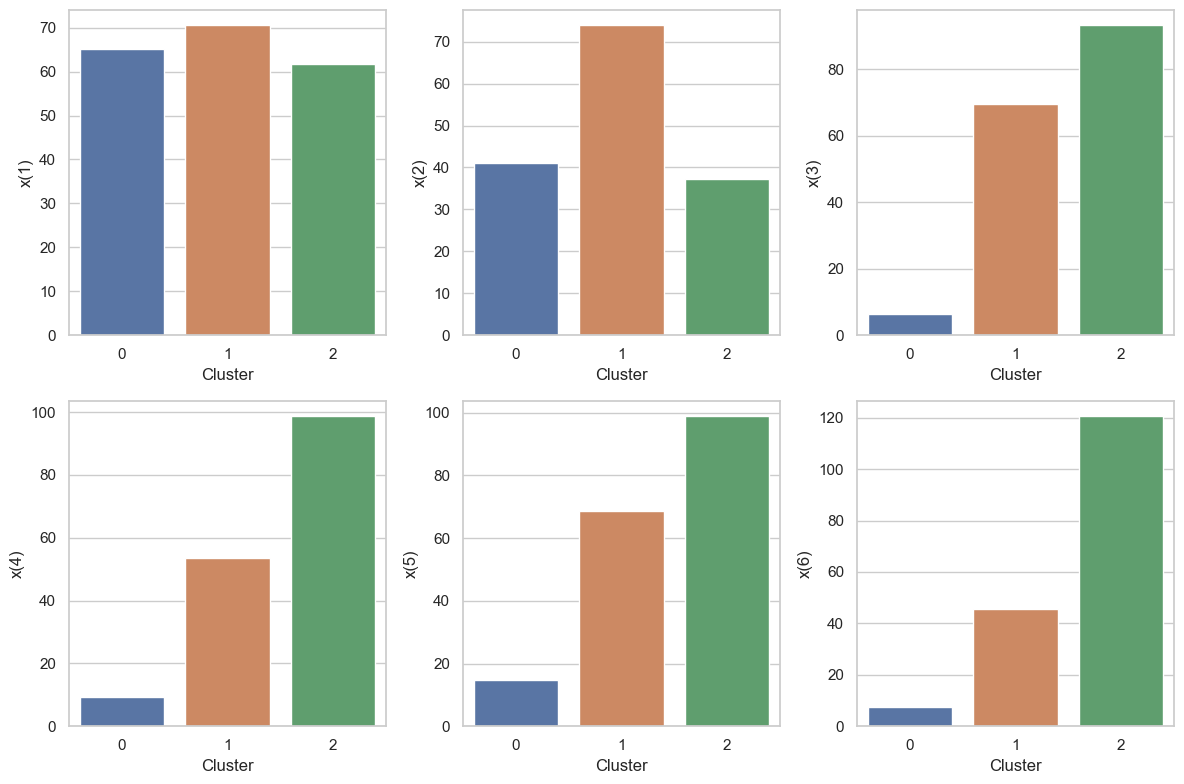

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


# Удалите столбец 'Country', так как он больше не нужен для кластеризации
df = df.drop('Country', axis=1)

# Группировка данных по кластерам и вычисление средних значений
cluster_means = df.groupby('Cluster').mean()

# Построение графиков средних значений характеристик для каждого кластера
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Построение для каждой характеристики
for i, col in enumerate(cluster_means.columns):
    plt.subplot(2, 3, i + 1)
    sns.barplot(x=cluster_means.index, y=cluster_means[col])
    

plt.tight_layout()
plt.show()


In [25]:
df1=pd.read_excel('олимп.xlsx', header=0, names=['test', 'olimp'])

print(df1)

     test  olimp
0      60     17
1      57     31
2      83     34
3      57     15
4      53     41
..    ...    ...
192    60     36
193    50     42
194    77      3
195    33     13
196    37     14

[197 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


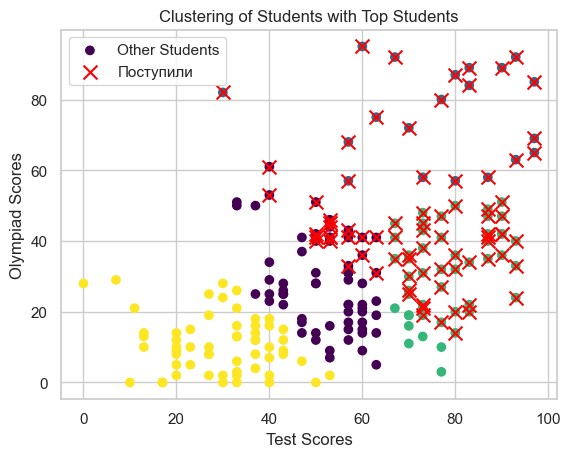

Cluster
0    68
1    20
2    51
3    58
Name: count, dtype: int64


In [31]:
df1['Total_Score'] = df1['test'] + df1['olimp']

# Проведем кластерный анализ с помощью K-means на 4 кластера
kmeans = KMeans(n_clusters=4, random_state=42)
df1['Cluster'] = kmeans.fit_predict(df1[['test', 'olimp']])

# Выберем лучших студентов (82 лучших)
top_students = df1.nlargest(82, 'Total_Score')

# Визуализация результатов кластеризации и лучших студентов
plt.scatter(df1['test'], df1['olimp'], c=df1['Cluster'], cmap='viridis', label='Other Students')
plt.scatter(top_students['test'], top_students['olimp'], c='red', marker='x', s=100, label='Поступили')
plt.xlabel('Test Scores')
plt.ylabel('Olympiad Scores')
plt.title('Clustering of Students with Top Students')
plt.legend()
plt.show()

# Вывод количества студентов в каждом кластере
cluster_counts = df1['Cluster'].value_counts().sort_index()
print(cluster_counts)